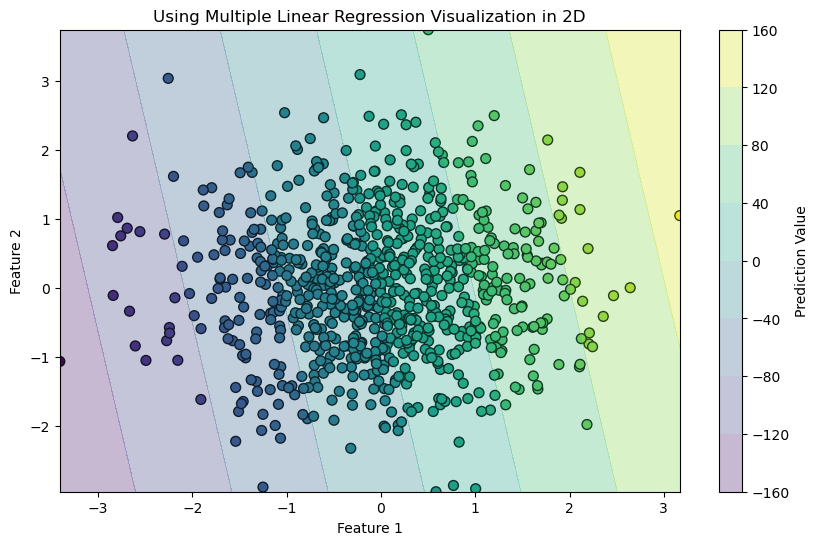

In [20]:
# Import necessary libraries
import numpy as np
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_regression
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### PART 1: Visualization Using Multiple Linear Regression ###

# Create and fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the original data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title('Using Multiple Linear Regression Visualization in 2D')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Create a mesh grid for plotting the regression surface
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100),
                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100))
zz = lin_reg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot the regression plane
plt.contourf(xx, yy, zz, alpha=0.3, cmap='viridis')
plt.colorbar(label='Prediction Value')

# Show the plot
plt.show()

### PART 2: Visualization BEFORE Applying Kernel ###

# Create the make_blobs dataset (for classification)
X, y = make_blobs(n_samples=300, centers=2, cluster_std=1.0, random_state=42)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the original 2D dataset (before applying the kernel)
fig = go.Figure()

# Add data points to the plot (before kernel transformation)
fig.add_trace(go.Scatter3d(
    x=X_train[:, 0], 
    y=X_train[:, 1], 
    z=np.zeros_like(X_train[:, 0]),  # Flat Z axis (since it's 2D data)
    mode='markers',
    marker=dict(size=5, color=y_train, colorscale='Viridis', opacity=0.8),
    name='Original Data'
))

# Set up the figure layout for pre-kernel plot
fig.update_layout(
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Z (Pre-kernel transformation)',
    ),
    title=dict(
        text="Before Applying SVM - Visualization in 3D",
        font=dict(size=24)  # Increased font size for the title
    ),
    showlegend=False
)

# Show the original data plot
fig.show()

### PART 3: Visualization AFTER Applying Kernel with SVM ###

# Apply Kernel PCA with RBF kernel to simulate kernel transformation
kpca = KernelPCA(kernel='rbf', gamma=1, n_components=3)
X_kpca = kpca.fit_transform(X_train)

# Train SVM model on the transformed data (after applying the kernel)
svm_model = SVC(kernel='linear')  # Linear decision boundary in the kernel space
svm_model.fit(X_kpca, y_train)

# Plot the 3D transformed dataset after applying the RBF kernel
fig2 = go.Figure()

# Add data points to the plot (after applying kernel)
fig2.add_trace(go.Scatter3d(
    x=X_kpca[:, 0], 
    y=X_kpca[:, 1], 
    z=X_kpca[:, 2],  # Now we have a third dimension
    mode='markers',
    marker=dict(size=5, color=y_train, colorscale='Viridis', opacity=0.8),
    name='Data Points'
))

# Plot the support vectors in 3D
support_vectors = X_kpca[svm_model.support_]
fig2.add_trace(go.Scatter3d(
    x=support_vectors[:, 0], 
    y=support_vectors[:, 1], 
    z=support_vectors[:, 2],
    mode='markers',
    marker=dict(size=8, color='red', symbol='circle'),
    name='Support Vectors'
))

# Create a mesh grid to visualize the decision boundary (hyperplane)
xx, yy = np.meshgrid(np.linspace(X_kpca[:, 0].min(), X_kpca[:, 0].max(), 30),
                     np.linspace(X_kpca[:, 1].min(), X_kpca[:, 1].max(), 30))

# Calculate Z values for the decision boundary plane, positive and negative hyperplanes
Z_decision = np.zeros_like(xx)
Z_pos_hyperplane = np.zeros_like(xx)
Z_neg_hyperplane = np.zeros_like(xx)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([[xx[i, j], yy[i, j], 0]])  # Keep Z=0 for visualization
        Z_decision[i, j] = svm_model.decision_function(point)  # Decision boundary
        Z_pos_hyperplane[i, j] = Z_decision[i, j] + 1  # Positive hyperplane (+1)
        Z_neg_hyperplane[i, j] = Z_decision[i, j] - 1  # Negative hyperplane (-1)

# Plot the decision boundary surface (best-fit hyperplane)
fig2.add_trace(go.Surface(
    x=xx, y=yy, z=Z_decision,
    colorscale=[[0, 'red'], [1, 'red']],  # Red for decision boundary
    opacity=0.5,
    showscale=False,
    name='Decision Boundary (Red)'
))

# Plot the positive hyperplane (+1 margin) in blue
fig2.add_trace(go.Surface(
    x=xx, y=yy, z=Z_pos_hyperplane,
    colorscale=[[0, 'blue'], [1, 'blue']],  # Blue for positive hyperplane
    opacity=0.3,
    showscale=False,
    name='Positive Hyperplane (Blue)'
))

# Plot the negative hyperplane (-1 margin) in green
fig2.add_trace(go.Surface(
    x=xx, y=yy, z=Z_neg_hyperplane,
    colorscale=[[0, 'green'], [1, 'green']],  # Green for negative hyperplane
    opacity=0.3,
    showscale=False,
    name='Negative Hyperplane (Green)'
))

# Set up the figure layout for post-kernel plot
fig2.update_layout(
    scene=dict(
        xaxis_title='Transformed Feature 1',
        yaxis_title='Transformed Feature 2',
        zaxis_title='Transformed Feature 3',
    ),
    title=dict(
        text="After Applying SVM - Visualization in 3D",
        font=dict(size=24)  # Increased font size for the title
    ),
    legend=dict(
        itemsizing='constant',
        font=dict(size=12),  # Adjusted legend font size
        title=dict(text='Legend', font=dict(size=14))  # Adjusted legend title size
    ),
    showlegend=True
)

# Show the transformed data plot with the decision boundary and hyperplanes
fig2.show()
